# **Packages** **Imported**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose,MaxPooling2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import os
from time import time
import numpy as np

# **Adding** **Noise**

In [ ]:
def salt_pepper_noise(DIR,path):
  count=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    noise_img = random_noise(image, mode='s&p',amount=0.3)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(path+str(count)+'.png',noise_img) 
    count+=1



In [ ]:
salt_pepper_noise('/content/drive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/drive/MyDrive/Breast Cancer DataSet/Train/Benign/salt_pepper_noise')

In [ ]:
salt_pepper_noise('/content/drive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/drive/MyDrive/Breast Cancer DataSet/Train/Malignant/salt_pepper_noise')

In [ ]:
def Gaussian_noise(DIR,path):
  c1=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    img_gauss = cv2.add(image,gauss)
    cv2.imwrite(path+str(c1)+'.png',img_gauss) 
    c1+=1

In [ ]:
Gaussian_noise('/content/drive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/drive/MyDrive/Breast Cancer DataSet/Train/Benign/Gaussian_noise')

In [ ]:
Gaussian_noise('/content/drive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/drive/MyDrive/Breast Cancer DataSet/Train/Malignant/Gaussian_noise')

In [ ]:
def speckle_noise(DIR,path):
  c2=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    noise = image + image * gauss
    cv2.imwrite(path+str(c2)+'.png',noise) 
    c2+=1

In [ ]:
speckle_noise('/content/drive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/drive/MyDrive/Breast Cancer DataSet/Train/Benign/speckle_noise')

In [ ]:
speckle_noise('/content/drive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/drive/MyDrive/Breast Cancer DataSet/Train/Malignant/speckle_noise')

# **Loading** **DataSet**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset_path = '/content/drive/MyDrive/Breast Cancer DataSet/Train'

images = []
labels = []

for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  

  for image_filename in os.listdir(subfolder_path):
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    labels.append(subfolder)


df = pd.DataFrame({'image': images, 'label': labels})

In [ ]:

dataset_path = '/content/drive/MyDrive/Breast Cancer DataSet/Test'

images = []
labels = []


for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  
  
  for image_filename in os.listdir(subfolder_path):
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    labels.append(subfolder)


df1 = pd.DataFrame({'image': images, 'label': labels})

In [ ]:
df1.tail()

,image,label
124,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
125,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
126,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
127,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
128,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign


In [ ]:
df.tail()

,image,label
3983,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
3984,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
3985,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
3986,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
3987,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train=df['image']
X_test=df1['image']
y_train=df['label']
y_test=df1['label']


# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})




In [ ]:
df_train = df_train.sample(frac = 1)

In [ ]:
df_test = df_test.sample(frac = 1)

In [ ]:
df_train.reset_index(drop=True)

,image,label
0,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
1,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
2,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
3,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
4,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
...,...,...
3983,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
3984,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
3985,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
3986,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant


In [ ]:
df_test.reset_index(drop=True)

,image,label
0,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
1,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
2,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
3,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
4,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
...,...,...
124,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
125,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
126,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
127,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant


In [ ]:
print(len(df_train))

3988


In [ ]:
print(len(df_test))

129


In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
df=pd.concat([df_test,df_train])

In [ ]:
len(df)

4117

In [ ]:
df.reset_index(drop=True)

,image,label
0,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
1,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
2,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
3,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
4,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant
...,...,...
4112,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
4113,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
4114,/content/drive/MyDrive/Breast Cancer DataSet/T...,Benign
4115,/content/drive/MyDrive/Breast Cancer DataSet/T...,Malignant


In [ ]:
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

image_size = 224
img_paths = df.image.tolist()
features_array = np.zeros((4117,2048))

for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = features.reshape(2048,)
    features_array[i,:] = features

1/1 [==============================] - 0s 24ms/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
features_array.shape

(4117, 2048)

In [ ]:
df1= pd.DataFrame(features_array)

df1

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.228957,0.375285,0.108912,0.014553,0.322927,0.022682,0.011638,0.000000,0.000000,0.000000,...,0.040746,0.038426,0.000000,0.538812,0.000000,0.002437,0.011683,1.103452,0.159903,0.011724
1,3.782362,0.582719,0.176515,0.009704,1.564746,0.396255,0.065591,0.000000,0.001071,0.000000,...,2.209229,0.454260,0.017447,0.002327,0.000000,0.000000,0.005046,0.000000,0.283807,0.005925
2,1.117487,0.318247,0.000000,0.019394,0.911693,0.000000,0.000000,0.000000,0.000000,0.021435,...,0.000000,0.000000,0.553923,0.059900,0.000000,0.000000,0.000000,0.000000,0.389561,0.017056
3,0.863584,0.287803,0.466166,0.018548,0.467543,0.056398,0.000000,0.000707,0.000000,0.000000,...,0.601000,1.041310,0.000000,0.029654,0.024717,0.000000,0.000000,1.957641,0.030249,0.000000
4,3.578840,0.000000,0.003061,0.002158,0.000000,0.000000,0.036911,0.040240,0.000000,0.000000,...,1.054260,0.467614,0.000000,0.064783,0.011040,0.003699,0.000000,0.402178,0.337374,0.022145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,0.610377,0.148246,0.537208,0.000000,0.909865,0.016357,0.010069,0.000000,0.006714,2.238100,...,0.321976,0.184904,0.334185,0.000000,0.172085,0.000000,0.066086,0.058391,0.222134,0.053844
4113,0.720351,0.255372,0.016417,0.000000,0.144815,0.012944,0.274935,0.000000,0.000000,0.000000,...,0.014575,0.680863,0.409601,0.046247,0.000000,0.034494,0.000000,0.306202,0.000000,0.000000
4114,0.808927,0.713766,0.332038,0.000000,1.012531,0.371311,0.000000,0.000000,0.303089,0.283255,...,0.218469,0.165187,0.217114,0.001496,0.722027,0.082711,0.625531,0.260082,2.753830,0.007327
4115,0.682283,0.206768,0.017046,0.000000,0.368849,0.012963,0.049886,0.000000,0.000416,0.000000,...,0.000000,0.252900,0.032070,0.072626,0.000000,0.000000,0.000000,0.112925,0.050893,0.026976


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X =df1.loc[:,0:2048]
y = df[['label']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
import time
start = time.time()

from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running time: 10.3768 seconds


In [ ]:
#training accuracy
pred = clf.predict(Xtrain)
print(accuracy_score(ytrain, pred))

0.886122077133313


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(ytest, preds))

0.8604368932038835


Text(0.5, 1.0, 'Confusion Matrix')

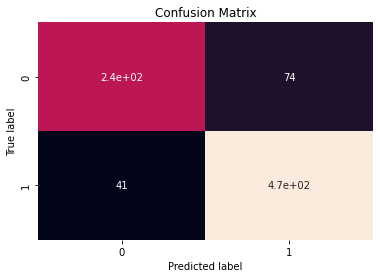

In [ ]:
cm = confusion_matrix(ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

      Benign       0.85      0.76      0.81       314
   Malignant       0.86      0.92      0.89       510

    accuracy                           0.86       824
   macro avg       0.86      0.84      0.85       824
weighted avg       0.86      0.86      0.86       824



# **VGG**-**16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

image_size = 224
img_paths = df.image.tolist()
features_array = np.zeros((4117,4096))

for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = features.reshape(4096,)
    features_array[i,:] = features

1/1 [==============================] - 0s 20ms/step


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
features_array.shape

(4117, 4096)

In [ ]:
df2= pd.DataFrame(features_array)

df2

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.000000,0.000000,0.0,0.396181,0.062343,0.0,0.436632,0.0,0.0,0.210460,...,2.630044,0.0,2.231159,0.000000,0.000000,2.132128,0.0,0.000000,3.132842,0.0
1,0.054383,0.000000,0.0,0.563340,0.905917,0.0,0.524396,0.0,0.0,0.000000,...,3.108289,0.0,0.000000,0.000000,0.022034,2.428164,0.0,0.000000,2.747715,0.0
2,0.000000,0.000000,0.0,0.854315,1.623893,0.0,1.743087,0.0,0.0,0.000000,...,4.984867,0.0,0.000000,0.000000,0.673671,0.000000,0.0,0.000000,2.857655,0.0
3,0.000000,0.000000,0.0,0.000000,0.550192,0.0,1.464710,0.0,0.0,0.997028,...,1.079131,0.0,0.000000,0.000000,0.000000,2.071518,0.0,0.000000,1.853864,0.0
4,0.000000,0.000000,0.0,0.319548,0.000000,0.0,2.291792,0.0,0.0,0.000000,...,3.237522,0.0,0.218770,0.000000,0.000000,0.221231,0.0,0.000000,1.584391,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,0.000000,0.878723,0.0,0.471720,1.358677,0.0,0.745361,0.0,0.0,0.000000,...,3.347308,0.0,0.000000,0.000000,0.000000,3.256439,0.0,0.107616,3.295174,0.0
4113,0.000000,0.000000,0.0,0.194333,2.839143,0.0,0.000000,0.0,0.0,0.000000,...,2.736957,0.0,3.186835,0.000000,0.827509,3.325936,0.0,0.867813,0.000000,0.0
4114,0.000000,0.094354,0.0,1.264988,0.039879,0.0,0.373268,0.0,0.0,0.000000,...,2.178605,0.0,0.706925,2.252445,1.503330,0.852792,0.0,0.000000,2.991742,0.0
4115,0.000000,0.000000,0.0,0.000000,1.941142,0.0,1.984841,0.0,0.0,0.000000,...,0.874749,0.0,1.608140,0.000000,0.000000,1.558094,0.0,0.185689,1.098078,0.0


In [ ]:
X =df2.loc[:,0:4096]
y = df[['label']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
import time
start = time.time()

from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running time: 24.6803 seconds


In [ ]:
#training accuracy
pred = clf.predict(Xtrain)
print(accuracy_score(ytrain, pred))

0.8776191922259338


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(ytest, preds))

0.8531553398058253


Text(0.5, 1.0, 'Confusion Matrix')

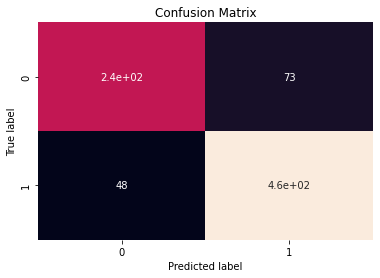

In [ ]:
cm = confusion_matrix(ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

      Benign       0.84      0.77      0.80       317
   Malignant       0.86      0.91      0.88       507

    accuracy                           0.85       824
   macro avg       0.85      0.84      0.84       824
weighted avg       0.85      0.85      0.85       824



# **DENSENET**

In [ ]:
from keras.applications.densenet import DenseNet201

In [ ]:
base_model = DenseNet201(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

image_size = 224
img_paths = df.image.tolist()
features_array = np.zeros((4117,1920))

for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = features.reshape(1920,)
    features_array[i,:] = features

1/1 [==============================] - 0s 45ms/step


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
features_array.shape

(4117, 1920)

In [ ]:
df3= pd.DataFrame(features_array)


In [ ]:
X =df3.loc[:,0:1920]
y = df[['label']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
import time
start = time.time()

from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running time: 12.9044 seconds


In [ ]:
#training accuracy
pred = clf.predict(Xtrain)
print(accuracy_score(ytrain, pred))

0.774369875493471


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(ytest, preds))

0.779126213592233


Text(0.5, 1.0, 'Confusion Matrix')

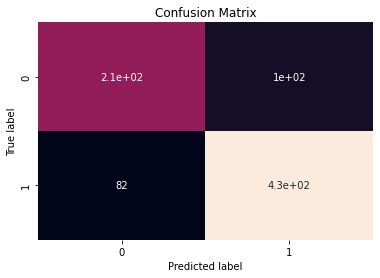

In [ ]:
cm = confusion_matrix(ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

      Benign       0.72      0.68      0.70       311
   Malignant       0.81      0.84      0.83       513

    accuracy                           0.78       824
   macro avg       0.77      0.76      0.76       824
weighted avg       0.78      0.78      0.78       824



# **MOBILENET**

In [ ]:
from keras.applications import MobileNet

In [ ]:
base_model = MobileNet(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('reshape_2').output)

image_size = 224
img_paths = df.image.tolist()
features_array = np.zeros((4117,1000))

for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = features.reshape(1000,)
    features_array[i,:] = features

1/1 [==============================] - 0s 24ms/step


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
df4= pd.DataFrame(features_array)


In [ ]:
X =df4.loc[:,0:1000]
y = df[['label']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
import time
start = time.time()

from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running time: 4.9046 seconds


In [ ]:
#training accuracy
pred = clf.predict(Xtrain)
print(accuracy_score(ytrain, pred))

0.7540236866079563


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(ytest, preds))

0.7354368932038835


Text(0.5, 1.0, 'Confusion Matrix')

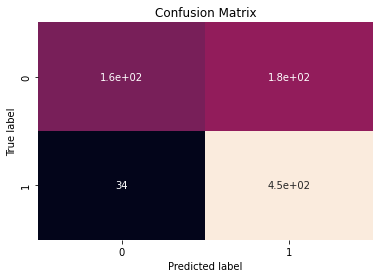

In [ ]:
cm = confusion_matrix(ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

      Benign       0.82      0.47      0.59       344
   Malignant       0.71      0.93      0.80       480

    accuracy                           0.74       824
   macro avg       0.77      0.70      0.70       824
weighted avg       0.76      0.74      0.72       824

